<img style="float: left;;" src='Figures/alinco.png' /></a>

# Modulo II: Manipulación de Vectores Palabra

Utilizaremos wordembeddings previamente entrenados para encontrar analogías y equivalencias de palabras. Aplicaremos operaciones de álgebra lineal usando `NumPy` para encontrar analogías entre palabras manualmente.

In [2]:
import pandas as pd
import numpy as np
import pickle

word_embeddings = pickle.load(open("Data/word_embeddings_subset.p", "rb"))

In [3]:
len(word_embeddings)

243

In [4]:
word_embeddings

{'country': array([-0.08007812,  0.13378906,  0.14355469,  0.09472656, -0.04736328,
        -0.02355957, -0.00854492, -0.18652344,  0.04589844, -0.08154297,
        -0.03442383, -0.11621094,  0.21777344, -0.10351562, -0.06689453,
         0.15332031, -0.19335938,  0.26367188, -0.13671875, -0.05566406,
         0.07470703, -0.00070953,  0.09375   , -0.14453125,  0.04296875,
        -0.01916504, -0.22558594, -0.12695312, -0.0168457 ,  0.05224609,
         0.0625    , -0.1484375 , -0.01965332,  0.17578125,  0.10644531,
        -0.04760742, -0.10253906, -0.28515625,  0.10351562,  0.20800781,
        -0.07617188, -0.04345703,  0.08642578,  0.08740234,  0.11767578,
         0.20996094, -0.07275391,  0.1640625 , -0.01135254,  0.0025177 ,
         0.05810547, -0.03222656,  0.06884766,  0.046875  ,  0.10107422,
         0.02148438, -0.16210938,  0.07128906, -0.16210938,  0.05981445,
         0.05102539, -0.05566406,  0.06787109, -0.03759766,  0.04345703,
        -0.03173828, -0.03417969, -0.011

In [5]:
word_embeddings['Paris']

array([-0.01855469,  0.13183594, -0.00631714,  0.19824219,  0.2265625 ,
        0.09960938, -0.29101562, -0.28320312, -0.15234375,  0.17578125,
       -0.3125    ,  0.04394531,  0.359375  , -0.30664062, -0.109375  ,
       -0.078125  ,  0.13476562,  0.06787109,  0.06396484,  0.06982422,
       -0.08544922, -0.2109375 ,  0.05102539,  0.09912109,  0.16308594,
        0.09765625, -0.1640625 ,  0.00595093,  0.04370117,  0.02722168,
       -0.00927734, -0.05444336, -0.40820312, -0.04931641, -0.30078125,
       -0.15039062,  0.02490234,  0.09570312, -0.24902344, -0.01391602,
       -0.01043701,  0.03808594,  0.14160156,  0.20703125,  0.04345703,
        0.23339844, -0.09570312, -0.0534668 ,  0.01953125,  0.40625   ,
        0.03808594,  0.1328125 ,  0.05712891, -0.23828125, -0.39257812,
        0.16210938, -0.29882812, -0.19042969, -0.22070312, -0.10205078,
        0.1171875 ,  0.10546875,  0.01123047, -0.14550781, -0.14746094,
        0.02770996, -0.25195312,  0.07177734, -0.01031494,  0.12

In [6]:
country_vec = word_embeddings['country']
country_vec

array([-0.08007812,  0.13378906,  0.14355469,  0.09472656, -0.04736328,
       -0.02355957, -0.00854492, -0.18652344,  0.04589844, -0.08154297,
       -0.03442383, -0.11621094,  0.21777344, -0.10351562, -0.06689453,
        0.15332031, -0.19335938,  0.26367188, -0.13671875, -0.05566406,
        0.07470703, -0.00070953,  0.09375   , -0.14453125,  0.04296875,
       -0.01916504, -0.22558594, -0.12695312, -0.0168457 ,  0.05224609,
        0.0625    , -0.1484375 , -0.01965332,  0.17578125,  0.10644531,
       -0.04760742, -0.10253906, -0.28515625,  0.10351562,  0.20800781,
       -0.07617188, -0.04345703,  0.08642578,  0.08740234,  0.11767578,
        0.20996094, -0.07275391,  0.1640625 , -0.01135254,  0.0025177 ,
        0.05810547, -0.03222656,  0.06884766,  0.046875  ,  0.10107422,
        0.02148438, -0.16210938,  0.07128906, -0.16210938,  0.05981445,
        0.05102539, -0.05566406,  0.06787109, -0.03759766,  0.04345703,
       -0.03173828, -0.03417969, -0.01116943,  0.06201172, -0.08

In [7]:
len(country_vec)

300

Ahora que el modelo está cargado, podemos echar un vistazo a las representaciones de palabras. Primero, tenga en cuenta que _word_embeddings_ es un diccionario. Cada palabra es la clave de la entrada y el valor es su correspondiente presentación vectorial. Recuerde que los corchetes permiten el acceso a cualquier entrada si existe la clave.

Es importante tener en cuenta que almacenamos cada vector como una matriz NumPy. Nos permite usar las operaciones de álgebra lineal sobre él.

Los vectores tienen un tamaño de 300, mientras que el tamaño del vocabulario de Google News es de alrededor de 3 millones de palabras.

In [8]:
def vec(w):
    return word_embeddings[w]

## Operando con word embeddings

Recuerde que comprender los datos es uno de los pasos más críticos en la ciencia de datos. Los wordembeddings son el resultado de procesos de aprendizaje automático y serán parte de la entrada para procesos posteriores. Los wordembeddings deben validarse o al menos comprenderse porque el rendimiento del modelo derivado dependerá en gran medida de su calidad.

Los wordembeddings son matrices multidimensionales, generalmente con cientos de atributos que suponen un desafío para su interpretación.

A continuación utilizaremos algunos wordembeddings y un par de sus atributos para visualización.



In [9]:
import matplotlib.pyplot as plt

words=['oil','gas','happy','sad','city','town', 'village', 'Paris', 'France', 'Madrid', 'Spain']

bag2d = np.array([vec(word) for word in words])

In [10]:
bag2d

array([[-0.13964844,  0.06225586, -0.27929688, ...,  0.20410156,
         0.23535156, -0.05102539],
       [-0.16113281,  0.10546875, -0.13867188, ...,  0.25585938,
         0.20214844, -0.01928711],
       [-0.0005188 ,  0.16015625,  0.0016098 , ..., -0.03540039,
         0.08886719, -0.30273438],
       ...,
       [ 0.04858398,  0.07861328,  0.32421875, ..., -0.0222168 ,
         0.16015625, -0.07177734],
       [-0.09619141, -0.19433594,  0.20898438, ...,  0.07275391,
         0.08105469,  0.27148438],
       [ 0.03149414, -0.18261719,  0.16308594, ...,  0.03759766,
         0.19628906,  0.1796875 ]], dtype=float32)

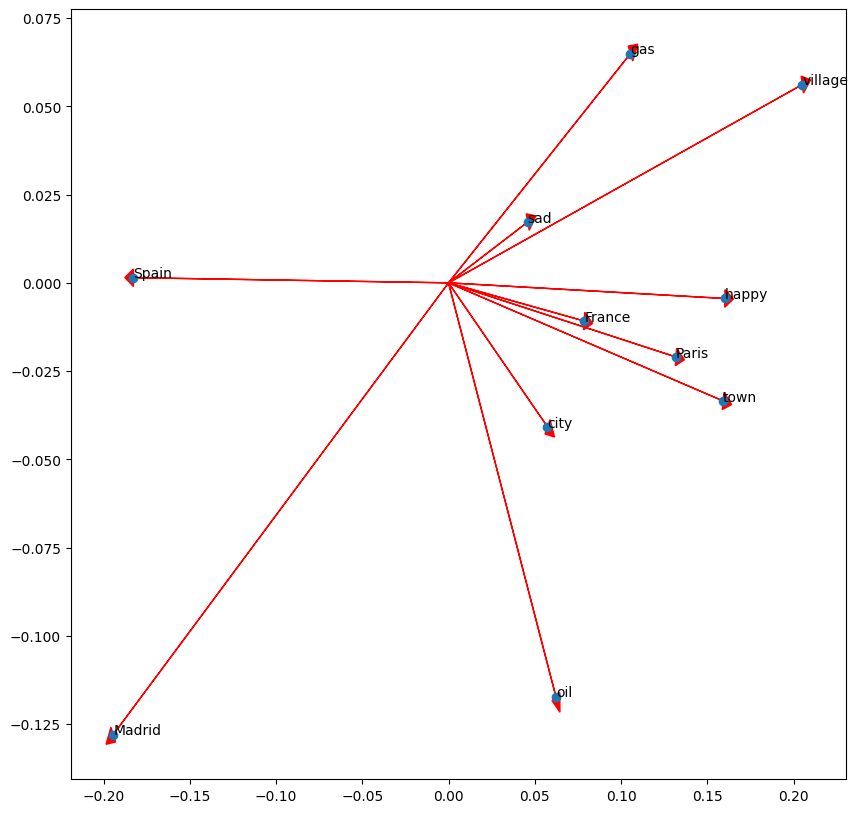

In [11]:
fig,ax = plt.subplots(figsize=(10,10))

col1=1 # axis x
col2= 80# axis y

for word in bag2d:
    ax.arrow(0,0, word[col1], word[col2], head_width=0.005, head_length= 0.005, fc='r', ec='r', width=1e-5)

ax.scatter(bag2d[:,col1], bag2d[:,col2])

for i in range (0,len(words)):
    ax.annotate(words[i], (bag2d[i,col1], bag2d[i, col2]))

plt.show()



Tenga en cuenta que palabras similares como 'village' y 'town' o 'petroleum', 'petróleo' y 'gas' tienden a apuntar en la misma dirección. Además, tenga en cuenta que "sad" y "happy" se ven juntos; sin embargo, los vectores apuntan en direcciones opuestas.


## Distancia  entre las palabras

Ploteando las palabras 'sad', 'happy', 'town', and 'village'. En este mismo gráfico, mostraremos el vector de 'village' a 'city' y el vector de 'sad' a 'happy'. Usemos NumPy para estas operaciones de álgebra lineal.

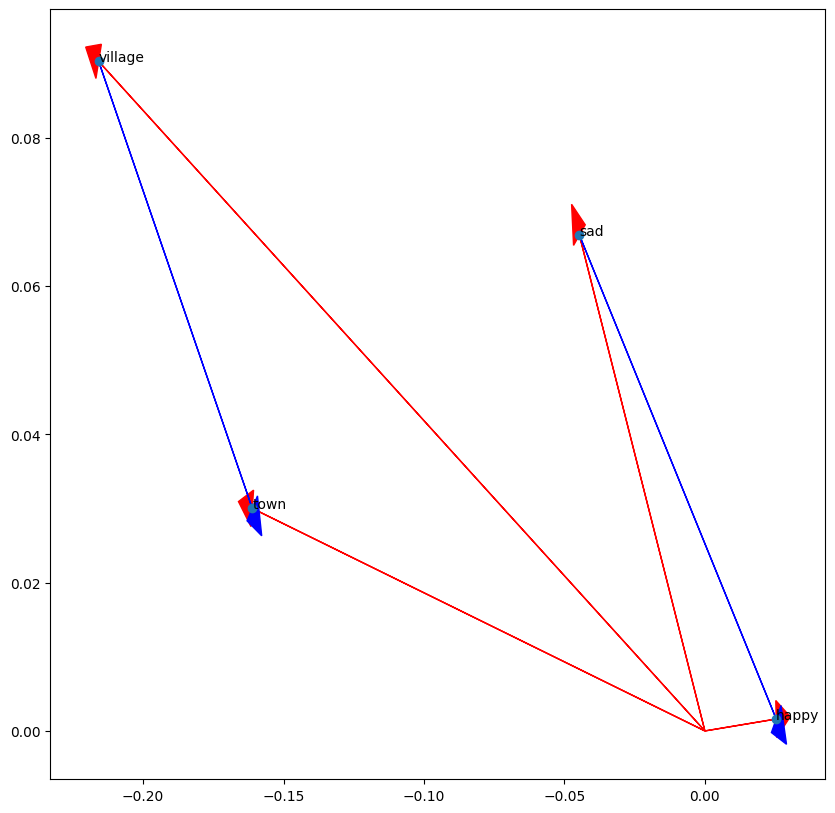

In [12]:
words = ['sad', 'happy', 'town', 'village']

bag2d = np.array([vec(word) for word in words])

fig, ax = plt.subplots(figsize=(10,10))

col1=3
col2=2

for word in bag2d:
    ax.arrow(0,0,word[col1],word[col2],head_width=0.005, head_length= 0.005,
             fc='r', ec='r', width=1e-5)

village = vec('village')
town = vec('town')

diff = town - village
ax.arrow(village[col1],village[col2],diff[col1],diff[col2],head_width=0.005,
         head_length= 0.005, fc='b', ec='b', width=1e-5)


sad = vec('sad')
happy = vec('happy')

diff = happy - sad
ax.arrow(sad[col1],sad[col2],diff[col1],diff[col2],head_width=0.005,
         head_length= 0.005, fc='b', ec='b', width=1e-5)

ax.scatter(bag2d[:,col1], bag2d[:,col2])

for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i,col1], bag2d[i,col2]))

plt.show()

## Algebra Lineal con word embeddings



In [13]:
vec('town')

array([ 0.12353516,  0.15917969,  0.0300293 , -0.16113281,  0.015625  ,
        0.11181641,  0.03979492, -0.19628906, -0.03930664,  0.06787109,
        0.14648438, -0.04370117, -0.11425781, -0.03759766, -0.171875  ,
        0.13867188, -0.18652344,  0.203125  ,  0.09912109,  0.00549316,
       -0.08642578, -0.00390625, -0.03417969, -0.04370117,  0.11279297,
       -0.17675781, -0.03442383,  0.19238281,  0.01330566, -0.18261719,
        0.16113281, -0.06396484, -0.04736328,  0.20214844, -0.03088379,
       -0.25585938,  0.18066406, -0.14746094,  0.12158203, -0.03198242,
       -0.25976562,  0.15039062,  0.0390625 , -0.11523438, -0.12255859,
        0.13183594, -0.12695312, -0.00805664, -0.06152344,  0.09619141,
       -0.00445557,  0.02331543,  0.14746094, -0.08447266, -0.07324219,
       -0.19628906, -0.16308594,  0.21582031, -0.0559082 ,  0.06738281,
       -0.02307129,  0.00610352, -0.02648926, -0.13769531, -0.04150391,
        0.16015625, -0.11914062,  0.06152344,  0.01831055,  0.00

In [14]:
np.linalg.norm(vec('town'))


2.3858097

In [15]:
np.linalg.norm(vec('sad'))


2.9004838

## Prediciendo capitales

Ahora, aplicando la diferencia y la suma de vectores, se puede crear una representación vectorial para una nueva palabra. Por ejemplo, podemos decir que la diferencia vectorial entre 'Francia' y 'París' representa el concepto de Capital.




In [16]:
capital = vec('France') - vec('Paris')

In [17]:
capital

array([ 0.06713867, -0.05322266,  0.3305359 , -0.16333008, -0.14941406,
       -0.06420898,  0.16503906, -0.10351562,  0.02050781, -0.14660645,
        0.16796875, -0.18652344, -0.1796875 ,  0.03125   , -0.05566406,
        0.17138672, -0.01757812,  0.11474609, -0.00292969,  0.04443359,
        0.2680664 ,  0.09423828, -0.08349609, -0.17480469, -0.15344238,
       -0.01171875, -0.12109375, -0.2618103 , -0.0135498 ,  0.1895752 ,
       -0.09082031,  0.08300781,  0.12695312, -0.03466797,  0.28051758,
       -0.04589844, -0.07275391, -0.02441406,  0.10644531,  0.00256348,
        0.12664795,  0.03417969,  0.00585938, -0.05664062,  0.09716797,
        0.01367188, -0.07421875,  0.13110352, -0.07397461, -0.23925781,
       -0.18359375, -0.11157227, -0.13232422,  0.2841797 ,  0.13671875,
       -0.01269531, -0.26367188,  0.05566406,  0.03320312,  0.0987854 ,
       -0.03271484,  0.02832031,  0.01867676, -0.14746094, -0.00878906,
       -0.02520752,  0.24090576, -0.14257812,  0.02935791,  0.02

In [18]:
country = vec('Madrid') + capital

In [19]:
print(country[0:5])

[-0.02905273 -0.2475586   0.53952026  0.20581055 -0.14862823]


Uno puede moverse desde la ciudad de Madrid en la dirección del concepto de Capital, y obtener algo cercano al país correspondiente al que Madrid es la Capital.

In [20]:
diff = country - vec('Spain')

In [21]:
print(diff[0:5])

[-0.06054688 -0.06494141  0.37643433  0.08129883 -0.13007355]




Entonces, tenemos que buscar las palabras más cercanas en los vectores que coincidan con el país candidato. La palabra más similar debe ser 'España'. Definamos una función que nos ayude a hacerlo. Almacenaremos nuestra incrustación de palabras como un DataFrame, que facilitará las operaciones de búsqueda basadas en los vectores numéricos.

In [22]:
keys = word_embeddings.keys()
data = []

for key in keys:
    data.append(word_embeddings[key])

embeddings = pd.DataFrame(data=data, index=keys)

embeddings.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
country,-0.080078,0.133789,0.143555,0.094727,-0.047363,-0.023560,-0.008545,-0.186523,0.045898,-0.081543,...,-0.145508,0.067383,-0.244141,-0.077148,0.047607,-0.075195,-0.149414,-0.044189,0.097168,0.067383
city,-0.010071,0.057373,0.183594,-0.040039,-0.029785,-0.079102,0.071777,0.013306,-0.143555,0.011292,...,0.024292,-0.168945,-0.062988,0.117188,-0.020508,0.030273,-0.247070,-0.122559,0.076172,-0.234375
China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,0.034424,...,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590
Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,0.200195,...,-0.100586,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957
oil,-0.139648,0.062256,-0.279297,0.063965,0.044434,-0.154297,-0.184570,-0.498047,0.047363,0.110840,...,-0.195312,-0.345703,0.217773,-0.091797,0.051025,0.061279,0.194336,0.204102,0.235352,-0.051025
town,0.123535,0.159180,0.030029,-0.161133,0.015625,0.111816,0.039795,-0.196289,-0.039307,0.067871,...,-0.007935,-0.091797,-0.265625,0.029297,0.089844,-0.049805,-0.202148,-0.079590,0.068848,-0.164062
Canada,-0.136719,-0.154297,0.269531,0.273438,0.086914,-0.076172,-0.018677,0.006256,0.077637,-0.211914,...,0.105469,0.030762,-0.039307,0.183594,-0.117676,0.191406,0.074219,0.020996,0.285156,-0.257812
London,-0.267578,0.092773,-0.238281,0.115234,-0.006836,0.221680,-0.251953,-0.055420,0.020020,0.149414,...,-0.008667,-0.008484,-0.053223,0.197266,-0.296875,0.064453,0.091797,0.058350,0.022583,-0.101074
England,-0.198242,0.115234,0.062500,-0.058350,0.226562,0.045898,-0.062256,-0.202148,0.080566,0.021606,...,0.135742,0.109375,-0.121582,0.008545,-0.171875,0.086914,0.070312,0.003281,0.069336,0.056152
Australia,0.048828,-0.194336,-0.041504,0.084473,-0.114258,-0.208008,-0.164062,-0.269531,0.079102,0.275391,...,0.021118,0.171875,0.042236,0.221680,-0.239258,-0.106934,0.030884,0.006622,0.051270,-0.135742


In [23]:
def find_closest_word(v,k=1):
    diff = embeddings.values - v

    delta = np.sum(diff*diff, axis=1)
    i = np.argmin(delta)

    return embeddings.iloc[i].name



In [24]:
find_closest_word(country)

'Spain'

Ahora busquemos el nombre que corresponde al país

## Predicción de otros Países

In [25]:
find_closest_word(vec('Berlin')+capital)

'Germany'

In [26]:
find_closest_word(vec('Beijing')+capital)

'China'

In [27]:
find_closest_word(vec('Lisbon')+capital)

'Lisbon'

## Representa una oración como un vector

Una oración completa se puede representar como un vector sumando todos los vectores de palabras que se ajustan a la oración. Dejanos ver.

In [28]:
keys

dict_keys(['country', 'city', 'China', 'Iraq', 'oil', 'town', 'Canada', 'London', 'England', 'Australia', 'Japan', 'Pakistan', 'Iran', 'gas', 'happy', 'Russia', 'Afghanistan', 'France', 'Germany', 'Georgia', 'Baghdad', 'village', 'Spain', 'Italy', 'Beijing', 'Jordan', 'Paris', 'Ireland', 'Turkey', 'Egypt', 'Lebanon', 'Taiwan', 'Tokyo', 'Nigeria', 'Vietnam', 'Moscow', 'Greece', 'Indonesia', 'sad', 'Syria', 'Thailand', 'Libya', 'Zimbabwe', 'Cuba', 'Ottawa', 'Tehran', 'Sudan', 'Kenya', 'Philippines', 'Sweden', 'Poland', 'Ukraine', 'Rome', 'Venezuela', 'Switzerland', 'Berlin', 'Bangladesh', 'Portugal', 'Ghana', 'Athens', 'king', 'Madrid', 'Somalia', 'Dublin', 'Qatar', 'Chile', 'Islamabad', 'Bahrain', 'Nepal', 'Norway', 'Serbia', 'Kabul', 'continent', 'Brussels', 'Belgium', 'Uganda', 'petroleum', 'Cairo', 'Denmark', 'Austria', 'Jamaica', 'Georgetown', 'Bangkok', 'Finland', 'Peru', 'Romania', 'Bulgaria', 'Hungary', 'Vienna', 'Kingston', 'Manila', 'Cyprus', 'Azerbaijan', 'Copenhagen', 'Fiji',

In [29]:
doc = "Spain petroleum city king"
vdoc = [vec(x) for x in doc.split()]
doc2vec = np.sum(vdoc,axis=0)
doc2vec

array([ 2.87475586e-02,  1.03759766e-01,  1.32629395e-01,  3.33007812e-01,
       -2.61230469e-02, -5.95703125e-01, -1.25976562e-01, -1.01306152e+00,
       -2.18544006e-01,  6.60705566e-01, -2.58300781e-01, -2.09960938e-02,
       -7.71484375e-02, -3.07128906e-01, -5.94726562e-01,  2.00561523e-01,
       -1.04980469e-02, -1.10748291e-01,  4.82177734e-02,  6.38977051e-01,
        2.36083984e-01, -2.69775391e-01,  3.90625000e-02,  4.16503906e-01,
        2.83416748e-01, -7.25097656e-02, -3.12988281e-01,  1.05712891e-01,
        3.22265625e-02,  2.38403320e-01,  3.88183594e-01, -7.51953125e-02,
       -1.26281738e-01,  6.60644531e-01, -7.89794922e-01, -7.04345703e-02,
       -1.14379883e-01, -4.78515625e-02,  4.76318359e-01,  5.31127930e-01,
        8.10546875e-02, -1.17553711e-01,  1.02050781e+00,  5.59814453e-01,
       -1.17187500e-01,  1.21826172e-01, -5.51574707e-01,  1.44531250e-01,
       -7.66113281e-01,  5.36102295e-01, -2.80029297e-01,  3.85986328e-01,
       -2.39135742e-01, -